# Text Classification for Airline Tweet Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

# Load Data

In [2]:
# Loading data and picking important features
data = pd.read_csv('Tweets.csv')
data = data[['airline_sentiment', 'text']]

In [3]:
data.head(100)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
95,negative,"@VirginAmerica Is it me, or is your website do..."
96,negative,@VirginAmerica I can't check in or add a bag. ...
97,negative,@VirginAmerica - Let 2 scanned in passengers l...
98,negative,@virginamerica What is your phone number. I ca...


In [4]:
raw_data = data[data['airline_sentiment']!='neutral']
raw_data['row_id'] = np.arange(len(raw_data))
raw_data= raw_data.set_index('row_id')

C:\Users\abish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
raw_data = raw_data.astype({ "text": 'str'})

In [6]:
import nltk 
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet') 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abish\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
tfidfvec = TfidfVectorizer() 
lemmatizer = WordNetLemmatizer() 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english')) 
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'} 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess(text1):
    text1=text1.lower()  #changing the words to lower case
    Temp=[] 
    words = nltk.word_tokenize(text1) # tokenizing the words
    tags = nltk.pos_tag(words) #tagging the words
    for i, word in enumerate(words): 
        if tags[i][1] in VERB_CODES:  
            lemmatized = lemmatizer.lemmatize(word, 'v') 
        else: 
            lemmatized = lemmatizer.lemmatize(word) 
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            Temp.append(lemmatized) 
    Final_sentence = ' '.join(Temp) #below are the transformation of the words to standard form
    Final_sentence = Final_sentence.replace("n't", " not") 
    Final_sentence = Final_sentence.replace("'m", " am") 
    Final_sentence = Final_sentence.replace("'s", " is") 
    Final_sentence = Final_sentence.replace("'re", " are") 
    Final_sentence = Final_sentence.replace("'ll", " will") 
    Final_sentence = Final_sentence.replace("'ve", " have") 
    Final_sentence = Final_sentence.replace("'d", " would") 
    return Final_sentence

In [9]:
raw_data["Text_Processed"]= raw_data['text'].apply(preprocess)

In [10]:
raw_data

,airline_sentiment,text,Text_Processed
row_id,,,
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus add commercial experience t...
1,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
2,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing
3,negative,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seat ...
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...
...,...,...,...
11536,negative,@AmericanAir my flight was Cancelled Flightled...,americanair flight cancel flightled leave tomo...
11537,negative,@AmericanAir right on cue with the delays👌,americanair right cue
11538,positive,@AmericanAir thank you we got on a different f...,americanair thank get different flight chicago


In [11]:
tfidf = tfidfvec.fit_transform(raw_data["Text_Processed"])
feature_names = tfidfvec.get_feature_names()
dense = tfidf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [12]:
X = df.loc[:, :]
Y = raw_data['airline_sentiment']

X = np.array(X)
Y = np.array(Y)

#label Encoding
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Part 1: Let's Start with SVM (svm.LinearSVC), Let's try to add balanced weight to handle the class-imbalance issue. 

(a) Let's try to add penalty 'l1' & 'l2' and using cross validation to select the best tuning parameters C.

(b) Computing the precision/recall, f1-score, and confusion matrix. 


In [14]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV 

In [15]:
clf = svm.LinearSVC(class_weight='balanced',C=1e20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
pred = clf.predict(X_test)
CM = confusion_matrix(y_test, pred)
print(f"\n Confusion Matrix: \n{CM}")
print(classification_report(y_test, pred))

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 Confusion Matrix: 
[[2524  247]
 [ 207  485]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2771
           1       0.66      0.70      0.68       692

    accuracy                           0.87      3463
   macro avg       0.79      0.81      0.80      3463
weighted avg       0.87      0.87      0.87      3463



In [16]:
param_grid = {'C': [0.001,0.01,0.02,0.03, 0.05, 0.1, 0.5, 1, 5, 10, 100, 1000]}
clf_l1 = svm.LinearSVC(penalty='l1', loss='squared_hinge',class_weight='balanced',dual = False)
l1 = GridSearchCV(clf_l1, param_grid, refit = True)
l1.fit(X_train, y_train) 
print(f"Best Tuning Parameter C for L1: {l1.best_params_}")  
l1.score(X_test, y_test)
pred1 = l1.predict(X_test)
CM1 = confusion_matrix(y_test, pred1)
print(f"\n Confusion Matrix: \n{CM1}")
print(classification_report(y_test, pred1))

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best Tuning Parameter C for L1: {'C': 1}

 Confusion Matrix: 
[[2568  203]
 [ 149  543]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2771
           1       0.73      0.78      0.76       692

    accuracy                           0.90      3463
   macro avg       0.84      0.86      0.85      3463
weighted avg       0.90      0.90      0.90      3463



In [17]:
clf_l2 = svm.LinearSVC(penalty='l2',class_weight='balanced',max_iter = 5000)
l2 = GridSearchCV(clf_l2, param_grid, refit = True)
l2.fit(X_train, y_train)
print(f"Best Tuning Parameter C for L2: {l2.best_params_}")   
l2.score(X_test, y_test)
pred2 = l2.predict(X_test)
CM2 = confusion_matrix(y_test, pred2)
print(f"\n Confusion Matrix: \n{CM2}")
print(classification_report(y_test, pred2))

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\abish\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best Tuning Parameter C for L2: {'C': 0.5}

 Confusion Matrix: 
[[2590  181]
 [ 136  556]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2771
           1       0.75      0.80      0.78       692

    accuracy                           0.91      3463
   macro avg       0.85      0.87      0.86      3463
weighted avg       0.91      0.91      0.91      3463




## Part 2: Logistic Regression 

(a) Plotting the ROC curve and computing the area under the ROC curve by selecting the Elastic-Net penalty and using the cross validation to choose the best tuning parameters C. 

(b) Plotting the precision recall curve and computing the average precision

(c) Choosing an optimal threshold to maximum the F1-score


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [100]:
parameters3= [{'tol':[1e-6,1e-4],'C':[0.001,0.01,0.1,1,10,100],'solver': ['saga'],'multi_class':['ovr','multinomial']}]

In [ ]:
LR = LogisticRegression(class_weight='balanced',penalty = 'elasticnet', max_iter=2000 , l1_ratio = 0)
cv3 = GridSearchCV(LR, parameters3, refit = True)
cv3.fit(X_train,y_train)
print("Best Parameters for logistic Regression: ",cv3.best_params_)

In [21]:
LR1 = LogisticRegression(penalty = 'elasticnet',class_weight='balanced', solver='saga',max_iter=2000 , l1_ratio = 0)
LR1.fit(X_train, y_train)
scores = LR1.predict_proba(X_test)
scores = scores[:, 1]
auc = roc_auc_score(y_test, scores)
print('Area under the ROC Curve = {}'.format(auc))
fpr, tpr, thresholds = roc_curve(y_test, scores)

Area under the ROC Curve = 0.9528109570009784


Text(0.5, 1.0, 'ROC Curve for Logistic Regression Model')

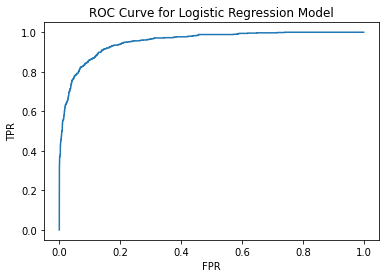

In [22]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression Model')

In [23]:
f1_result=[]
for t in thresholds:
    new_pred = scores > t
    cm = confusion_matrix(y_test, new_pred)
    precision = cm[1,1]/(cm[1,1] + cm[0,1])
    recall = cm[1,1]/(cm[1,1] + cm[1,0])
    f1 = 2*precision*recall/(precision+recall)
    f1_result.append(f1)
    print('F1 Score {}, Threshold {}'.format(f1, t))

C:\Users\abish\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


F1 Score nan, Threshold 1.9998540903320292
F1 Score nan, Threshold 0.9998540903320292
F1 Score 0.005763688760806917, Threshold 0.9998010190634169
F1 Score 0.008633093525179854, Threshold 0.9997860401287993
F1 Score 0.02002861230329042, Threshold 0.9997826374065044
F1 Score 0.03687943262411348, Threshold 0.9997412757103803
F1 Score 0.039660056657223795, Threshold 0.9996952735880696
F1 Score 0.056179775280898875, Threshold 0.999605722949326
F1 Score 0.05890603085553997, Threshold 0.999481186839613
F1 Score 0.06433566433566433, Threshold 0.999393358156576
F1 Score 0.06703910614525138, Threshold 0.9993469661829677
F1 Score 0.08310249307479224, Threshold 0.9988896806348965
F1 Score 0.08575380359612725, Threshold 0.9987322137662606
F1 Score 0.09366391184573004, Threshold 0.9987248102529854
F1 Score 0.10670314637482901, Threshold 0.9981643281777822
F1 Score 0.10928961748633878, Threshold 0.9981618652340113
F1 Score 0.11956521739130435, Threshold 0.998072360063519
F1 Score 0.12211668928086837,

F1 Score 0.753623188405797, Threshold 0.4384827408814672
F1 Score 0.7534591194968554, Threshold 0.43770494256431225
F1 Score 0.7529855436832181, Threshold 0.43732181338168297
F1 Score 0.7537688442211055, Threshold 0.4364562559265365
F1 Score 0.7532956685499058, Threshold 0.43634609692042997
F1 Score 0.75125, Threshold 0.4345992647524494
F1 Score 0.7507807620237352, Threshold 0.4344718554630522
F1 Score 0.7473618870266915, Threshold 0.4306275405653824
F1 Score 0.7468982630272953, Threshold 0.4305505603047091
F1 Score 0.746749226006192, Threshold 0.42748929186185536
F1 Score 0.7470624613481756, Threshold 0.4271958760486183
F1 Score 0.7473749227918467, Threshold 0.4270284017579346
F1 Score 0.7469135802469137, Threshold 0.4257283672899489
F1 Score 0.7467652495378928, Threshold 0.4252764758937692
F1 Score 0.7463054187192117, Threshold 0.4252734676042074
F1 Score 0.7461585740626921, Threshold 0.4244116963312651
F1 Score 0.7457002457002457, Threshold 0.4237721593557732
F1 Score 0.746470227133

F1 Score 0.5555555555555556, Threshold 0.20690650614639677
F1 Score 0.5553270259152613, Threshold 0.20677177850519118
F1 Score 0.5350217649386625, Threshold 0.19014738352580768
F1 Score 0.5348101265822786, Threshold 0.19011474844141935
F1 Score 0.5322327044025158, Threshold 0.18733946158834347
F1 Score 0.5320235756385068, Threshold 0.18721382878468507
F1 Score 0.5257851880573865, Threshold 0.1828208941904391
F1 Score 0.5255813953488372, Threshold 0.18264161484056304
F1 Score 0.5247295208655331, Threshold 0.18183996451659798
F1 Score 0.5245268443414446, Threshold 0.18181968841944876
F1 Score 0.5196790217806648, Threshold 0.17894798798014983
F1 Score 0.5194805194805194, Threshold 0.17893998574815506
F1 Score 0.5163002274450341, Threshold 0.17707985515214147
F1 Score 0.5161045850701024, Threshold 0.1770647969696604
F1 Score 0.5166666666666666, Threshold 0.17684664360870328
F1 Score 0.5164710336993562, Threshold 0.17676927405791465
F1 Score 0.5170325510976533, Threshold 0.17668850980818387

In [25]:
point=np.nanmax(f1_result)
print(point)
#F1 Score 0.787125091441112, Threshold 0.56354704736285

0.787125091441112


Text(0.5, 1.0, 'Precision and Recall Curve')

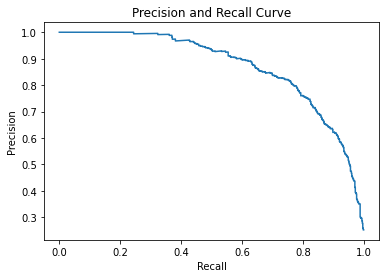

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, scores)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and Recall Curve')

In [37]:
from sklearn.metrics import average_precision_score
avg_score=average_precision_score(y_test, scores)
print(avg_score)

0.8715228188524996


## Part 3. Naive Bayesian

(a) Plotting the ROC curve and compute the area under the ROC curve. 

(b) Plotting the precision recall curve and compute the average precision. Choosing an optimal threshold to maximum the F1-score

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)
pred1 = model.predict(X_test)
CM = confusion_matrix(y_test, pred1)
print(f"\n Confusion Matrix: \n{CM}")
print(classification_report(y_test, pred1))



 Confusion Matrix: 
[[1737 1034]
 [ 191  501]]
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      2771
           1       0.33      0.72      0.45       692

    accuracy                           0.65      3463
   macro avg       0.61      0.68      0.59      3463
weighted avg       0.79      0.65      0.68      3463



In [30]:
model1 = GaussianNB()
model1.fit(X_train, y_train)
pred2 = model1.predict_proba(X_test)
pred2 = pred2[:, 1]
auc = roc_auc_score(y_test, pred2)
print('Area under the ROC Curve = {}'.format(auc))
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred2)

Area under the ROC Curve = 0.6754189760588089


Text(0.5, 1.0, 'ROC Curve for Naive Bayes')

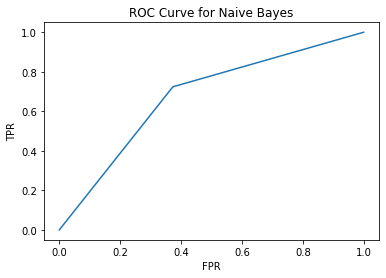

In [32]:
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Naive Bayes')

In [34]:
f_result=[]
for i in thresholds1:
    pred = pred2 > i
    cm = confusion_matrix(y_test, pred)
    precision = cm[1,1]/(cm[1,1] + cm[0,1])
    recall = cm[1,1]/(cm[1,1] + cm[1,0])
    f1 = 2*precision*recall/(precision+recall)
    f_result.append(f1)
    print('F1 Score {}, Threshold {}'.format(f1, t))

F1 Score nan, Threshold 0.0026778899247829604
F1 Score nan, Threshold 0.0026778899247829604
F1 Score 0.44993264481365064, Threshold 0.0026778899247829604


C:\Users\abish\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


Text(0.5, 1.0, 'Precision and Recall Curve')

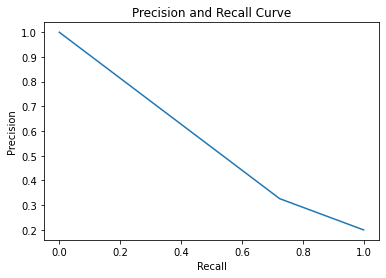

In [35]:
precision, recall, thresholds = precision_recall_curve(y_test, pred2)
plt.plot(recall,precision )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and Recall Curve')

In [38]:
avg_score1=average_precision_score(y_test, pred2)
print(avg_score1)

0.29145299722694873
